# Task 1

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import pybamm as pb

In [6]:
model=pb.lithium_ion.SPM()
# Experiment for 1C discharge
experiment = pb.Experiment(["Discharge at 1C until 2.5V"])

sim = pb.Simulation(model, experiment=experiment)
solution = sim.solve()

/Users/saudquadri/Library/Python/3.9/lib/python/site-packages/pybamm/simulation.py:120: UserWarning: The default solver changed to IDAKLUSolver after the v25.4.0. release. You can swap back to the previous default by using `pybamm.CasadiSolver()` instead.
  self._solver = solver or self._model.default_solver


In [15]:
# Concentration profiles at specific times
times = [0, 900, 1800, 2700, 3600]  # 0, 900s intervals up to 3600s

# Concentration variable for negative particle
c_s_n = solution["Negative particle concentration [mol.m-3]"]

#radius variable
r_n = solution["r_n [m]"]

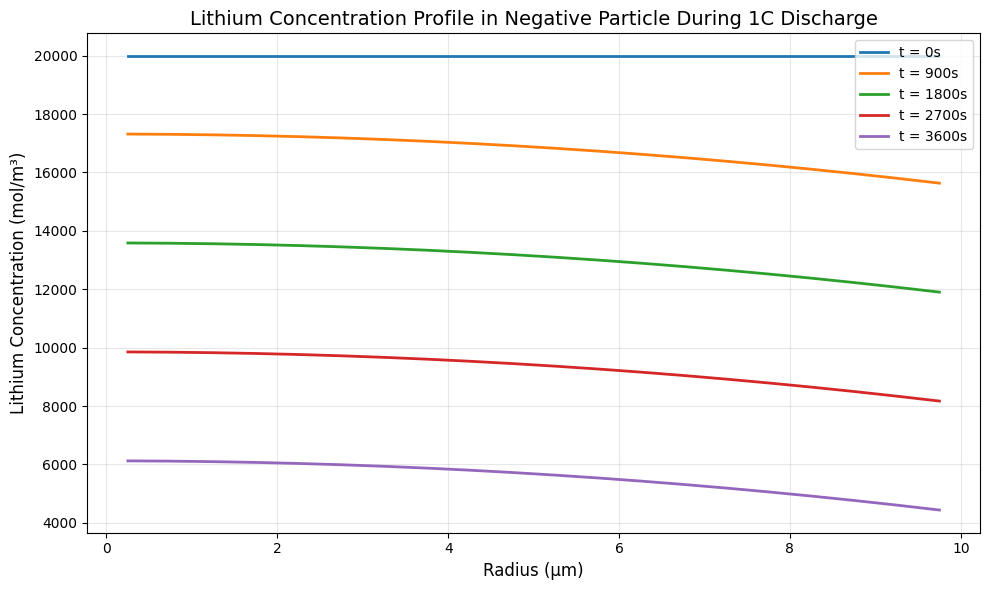

In [14]:
# Plot concentration vs radius at different times
plt.figure(figsize=(10, 6))

for t in times:
    # Get concentration at time t
    c_at_t = c_s_n(t=t)
    r_values = r_n(t=t)
    # Average concentration across the electrode for a given radius
    c_at_t = np.mean(c_at_t, axis=1)
    r_values = r_values[:, 0]
    plt.plot(r_values * 1e6, c_at_t, label=f't = {t}s', linewidth=2)

plt.xlabel('Radius (μm)', fontsize=12)
plt.ylabel('Lithium Concentration (mol/m³)', fontsize=12)
plt.title('Lithium Concentration Profile in Negative Particle During 1C Discharge', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Task 2

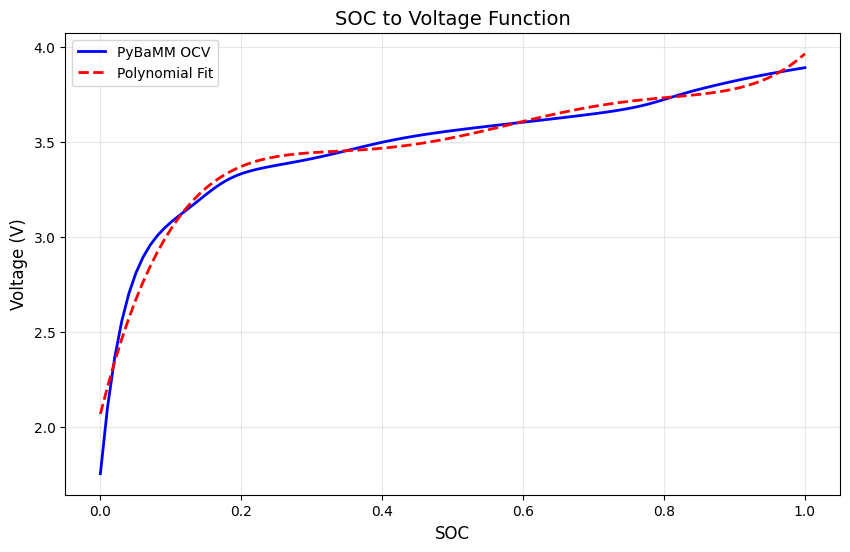

Test: SOC=0.5 → 3.524V


In [17]:
# Extract OCV data from PyBaMM
param = pb.ParameterValues("Chen2020")
soc_values = np.linspace(0, 1, 100)

# Get OCV functions
Un = param["Negative electrode OCP [V]"]
Up = param["Positive electrode OCP [V]"]

# Calculate OCV at different SOC values
sto_n = soc_values * 0.75 + 0.01
sto_p = 0.99 - soc_values * 0.5
ocv_data = np.array([Up(sp) - Un(sn) for sn, sp in zip(sto_n, sto_p)])

# Fit 5th degree polynomial
coeffs = np.polyfit(soc_values, ocv_data, 5)

# SOC to Voltage function
def soc_to_voltage(soc):
    return np.polyval(coeffs, soc)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(soc_values, ocv_data, 'b-', linewidth=2, label='PyBaMM OCV')
plt.plot(soc_values, soc_to_voltage(soc_values), 'r--', linewidth=2, label='Polynomial Fit')
plt.xlabel('SOC', fontsize=12)
plt.ylabel('Voltage (V)', fontsize=12)
plt.title('SOC to Voltage Function', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Test: SOC=0.5 → {soc_to_voltage(0.5):.3f}V")